State Vector simulator from scratch : For the QOSF, mentorship program

In [21]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

Here's a breakdown of how to implement a naive statevector simulator using matrix multiplication, following the instructions.

### Step 1: Define the Basic Quantum States and Gates
$|0\rangle = [1, 0] $,  $|1\rangle = [0, 1]$

The standard gate matrices are as follows:

**Identity Gate (I)**:
  I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
**X Gate (Pauli-X)**:
  \[
  X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
  \]

**Hadamard Gate \( H \)**:
  
  $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
  

**CNOT Gate (Control-Not)**:

  CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}

### Step 2: Initialize the Statevector

For \( n \) qubits, the initial state is $|0\rangle^{\otimes n}$, meaning all qubits are initialized in the zero state. For \( n \) qubits, the vector will have a size of $2^n$ (initialized as $[1, 0, 0, \dots, 0]$ in vector notation).

### Step 3: Apply Gates via Matrix Multiplication

Using numpy’s `np.kron` for the Kronecker product, we can create the composite state for multiple qubits. For each gate in the circuit:

- Calculate the full operator for multiple qubits by taking the Kronecker product if necessary (e.g., $I \otimes X$ to apply an X gate on the second qubit).
- Multiply the current state vector by the gate matrix using standard matrix multiplication (`@` or `np.dot` in numpy).

In [22]:
# Define the basic quantum gates
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]]) # the X gate
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]]) # the 1-qubit Hadamard Gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0], # the 2-qubit CNOT gate
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# Function to create an n-qubit zero state
def zero_state(n):
    state = np.array([1] + [0] * (2**n - 1), dtype=complex)
    return state

# Apply a single gate to a specific qubit
def apply_gate(state, gate, qubit, n):
    full_gate = 1
    for i in range(n):
        if i == qubit:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    return full_gate @ state

# Apply CNOT on two specific qubits
def apply_cnot(state, control, target, n):
    full_gate = 1
    for i in range(n):
        if i == control:
            full_gate = np.kron(full_gate, np.eye(2))
        elif i == target:
            full_gate = np.kron(full_gate, CNOT)
    return full_gate @ state

# Function to simulate a quantum circuit
def simulate_circuit(n, gates):
    state = zero_state(n)
    for gate, qubit in gates:
        state = apply_gate(state, gate, qubit, n)
    return state

Simulating Quantum Circuits: 100%|█████████████████████████████████████████████████████| 13/13 [00:41<00:00,  3.22s/it]


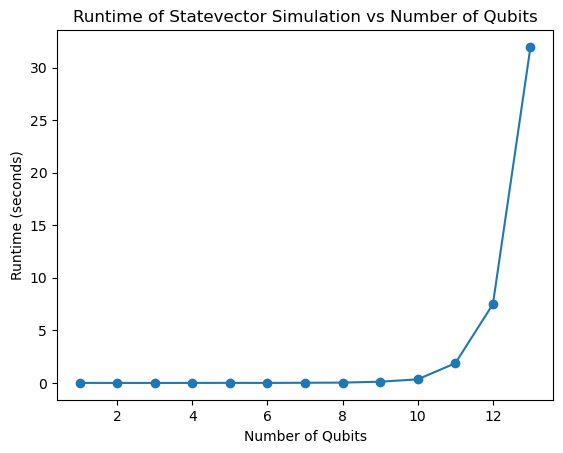

In [8]:
# Measure runtime as a function of qubits
def measure_runtime():
    qubits = list(range(1, 14))  # Vary the number of qubits
    times = []
    for n in tqdm(qubits, desc="Simulating Quantum Circuits"):  # Add tqdm here
        start_time = time.time()
        # Example circuit: Apply H on all qubits
        gates = [(H, i) for i in range(n)]
        simulate_circuit(n, gates)
        times.append(time.time() - start_time)
    return qubits, times

# Plot the results
qubits, times = measure_runtime()
plt.plot(qubits, times, marker='o')
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Statevector Simulation vs Number of Qubits")
plt.show()

The time complexity goes up exponentially!

In [25]:
zero_state(2)

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

Simulating Quantum Circuits: 100%|█████████████████████████████████████████████████████| 13/13 [00:25<00:00,  1.96s/it]


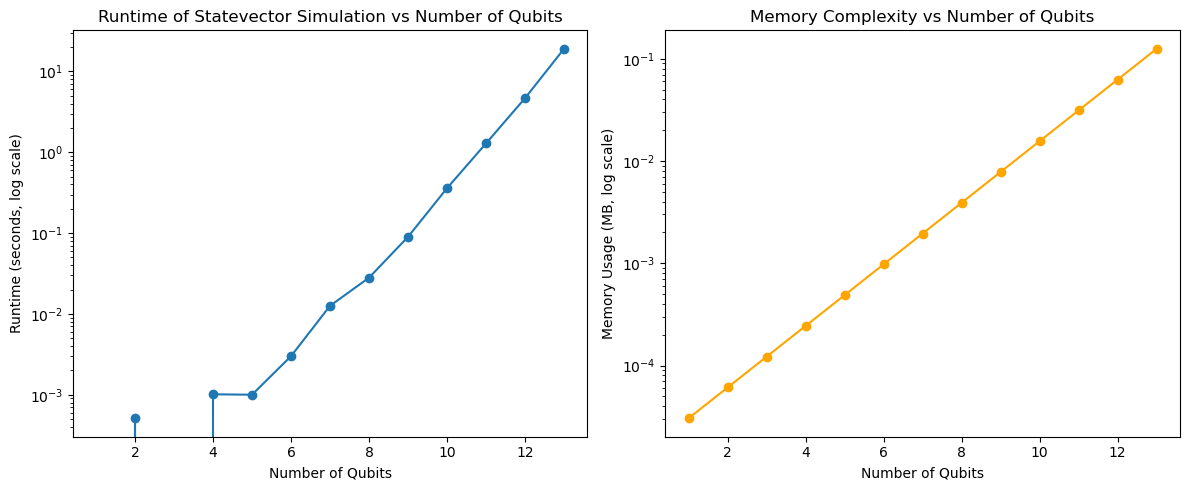

In [24]:
# Define the basic gates
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate

# Function to initialize a zero state vector
def zero_state(n):
    state = np.array([1] + [0] * (2**n - 1), dtype=complex)
    return state

# Example simulation function applying the Hadamard gate to each qubit
def simulate_circuit(n, gates):
    state = zero_state(n)
    for gate, qubit in gates:
        full_gate = 1
        for i in range(n):
            full_gate = np.kron(full_gate, gate if i == qubit else np.eye(2))
        state = full_gate @ state
    return state

# Measure runtime and estimate memory complexity as a function of qubits
def measure_runtime_and_memory():
    qubits = list(range(1, 14))  # Vary the number of qubits
    times = []
    memory_usage = []
    for n in tqdm(qubits, desc="Simulating Quantum Circuits"):
        start_time = time.time()
        # Apply H on all qubits
        gates = [(H, i) for i in range(n)]
        simulate_circuit(n, gates)
        times.append(time.time() - start_time)
        memory_usage.append(2**n * 16 / (1024**2))  # Approx memory in MB (complex numbers: 16 bytes per element)
    return qubits, times, memory_usage


# Run the measurements
qubits, times, memory_usage = measure_runtime_and_memory()

# Plot runtime on a semi-log scale
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(qubits, times, marker='o')
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("Runtime of Statevector Simulation vs Number of Qubits")

# Plot memory complexity on a semi-log scale
plt.subplot(1, 2, 2)
plt.semilogy(qubits, memory_usage, marker='o', color="orange")
plt.xlabel("Number of Qubits")
plt.ylabel("Memory Usage (MB, log scale)")
plt.title("Memory Complexity vs Number of Qubits")

plt.tight_layout()
plt.show()

Second part of the problem 


2) Advanced simulation using tensor multiplication

Tensors are generalizations of vectors and matrices to any number of dimensions. Instead of representing an n-qubit state as a vector of length 2^n, it may be more natural to write it as an n-dimensional tensor of shape (2, 2, …., 2). The transformations between these two representations are naturally possible via np.reshape and np.flatten.

Using tensor multiplication and the np.tensordot (or np.einsum) function, you can apply a gate to the quantum state by multiplying the 1- or 2-qubit matrices with the state tensor along the corresponding qubit axes.

Define a quantum circuit consisting of the 1- and 2-qubit matrix representations of X, H, CNOT (same as above) and apply them sequentially to the quantum state tensor via tensor multiplication.

Plot the runtime of your code as a function of the number of qubits. How many qubits can you simulate this way? Compare your results to subtask 1).


Simulating with Tensors: 100%|█████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.02it/s]


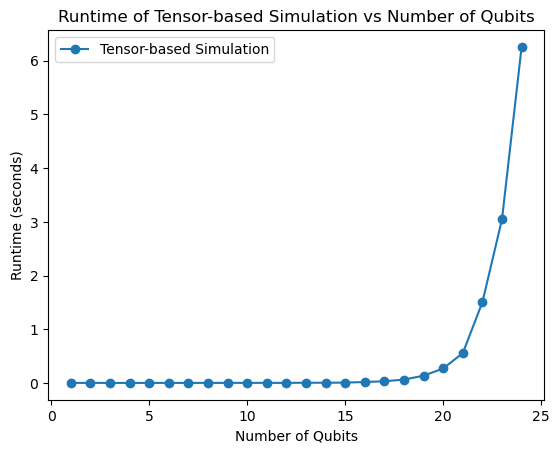

In [17]:
# Define the basic quantum gates
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]]).reshape(2, 2, 2, 2)

# Initialize an n-qubit zero state tensor
def zero_state_tensor(n):
    state = np.zeros((2,) * n, dtype=complex)
    state[(0,) * n] = 1
    return state

# Apply a single-qubit gate to a specific qubit in the tensor
def apply_single_qubit_gate_tensor(state, gate, qubit):
    axes = list(range(len(state.shape)))
    axes[qubit] = -1
    new_state = np.tensordot(gate, state, axes=([1], [qubit]))
    return np.moveaxis(new_state, -1, qubit)

# Apply a CNOT gate on two specific qubits in the tensor
def apply_cnot_tensor(state, control, target):
    # Apply CNOT by reshaping the state tensor and contracting along the control and target axes
    new_state = np.tensordot(CNOT, state, axes=([2, 3], [control, target]))
    # Rearrange the axes to restore the original shape
    axes = list(range(len(state.shape)))
    axes.remove(control)
    axes.remove(target - 1 if target > control else target)
    axes.insert(0, 0)  # Control axis
    axes.insert(1, 1)  # Target axis
    return np.transpose(new_state, axes)

# Function to simulate a quantum circuit with tensor operations
def simulate_circuit_tensor(n, gates):
    state = zero_state_tensor(n)
    for gate, qubit in gates:
        if gate is CNOT:
            # For two-qubit gate (CNOT), qubit is a tuple (control, target)
            state = apply_cnot_tensor(state, qubit[0], qubit[1])
        else:
            # For single-qubit gate
            state = apply_single_qubit_gate_tensor(state, gate, qubit)
    return state

# Measure runtime as a function of qubits using tensor multiplication
def measure_runtime_tensor():
    qubits = list(range(1, 25))  # Vary the number of qubits
    times = []
    for n in tqdm(qubits, desc="Simulating with Tensors"):
        start_time = time.time()
        # Example circuit: Apply H on all qubits
        gates = [(H, i) for i in range(n)]
        simulate_circuit_tensor(n, gates)
        times.append(time.time() - start_time)
    return qubits, times

# Run the measurement
qubits, tensor_times = measure_runtime_tensor()

# Plot the runtime for tensor-based simulation
plt.plot(qubits, tensor_times, marker='o', label="Tensor-based Simulation")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Tensor-based Simulation vs Number of Qubits")
plt.legend()
plt.show()

Explaining the steps for the first part of the code , Question 1

3) Bonus question

How would you sample from the final states in the statevector or tensor representations? 
And how about computing exact expectation values in the form <Ψ| Op |Ψ>?a


### Sampling from Final States in Statevector or Tensor Representations

To sample from the final states of a quantum circuit in either the statevector or tensor representation, we can follow these steps:

1. **Calculate Probabilities**: The probability of measuring a specific basis state $|x\rangle$ (where $x$ is a bitstring representing the measurement outcome) is given by  $p(x) = |\langle x | \Psi \rangle|^2 $, where $|\Psi\rangle$ is the final state of the quantum system. This probability is the squared magnitude of each component in the statevector.

2. **Generate Cumulative Distribution**: Using the probabilities, generate a cumulative distribution function (CDF) to enable efficient sampling by mapping a random number to a specific measurement outcome.

3. **Sample from the Distribution**: Generate a random number between 0 and 1, use the CDF to find the corresponding basis state, and return this state as the sampled outcome. Repeating this process provides multiple samples consistent with the probability distribution encoded in the statevector.

For a statevector $|\Psi\rangle$ of an $n$-qubit system, here’s example code to sample outcomes:


In [27]:
# Assume `statevector` is the final quantum state vector
def sample_from_statevector(statevector, num_samples=1):
    # Calculate the probabilities for each basis state
    probabilities = np.abs(statevector) ** 2
    # Sample according to the probability distribution
    outcomes = np.random.choice(len(statevector), size=num_samples, p=probabilities)
    # Convert outcomes to binary strings
    samples = [f"{outcome:0{int(np.log2(len(statevector)))}b}" for outcome in outcomes]
    return samples

# Example usage
# `statevector` is a 2^n array representing the final state of an n-qubit system
# samples = sample_from_statevector(statevector, num_samples=100)
# print(samples)

In [28]:
# Assume `statevector` is the final quantum state vector and `Op` is the operator matrix
def expectation_value(statevector, operator):
    # Apply the operator to the state
    op_psi = operator @ statevector
    # Compute the inner product <Psi | Op | Psi>
    expectation = np.vdot(statevector, op_psi)  # vdot handles conjugation of the first argument
    return expectation.real  # Assuming we want the real part

# Example usage
# `statevector` is a 2^n array, `operator` is a 2^n x 2^n matrix
# expectation = expectation_value(statevector, operator)
# print("Expectation value:", expectation)

Tensor product code with step by step explanation

In [29]:
# Initialize an n-qubit zero state tensor
def zero_state_tensor(n):
    # Create a tensor with shape (2, 2, ..., 2) of n dimensions, initialized to zero
    state = np.zeros((2,) * n, dtype=complex)
    # Set the first element (all zeros) to 1, representing |0...0> in the tensor format
    state[(0,) * n] = 1
    return state

In [32]:
zero_state_tensor(2)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [33]:
# Apply a single-qubit gate to a specific qubit in the tensor
def apply_single_qubit_gate_tensor(state, gate, qubit):
    # Create a list of axes representing the dimensions of the state tensor
    axes = list(range(len(state.shape)))
    # Set the axis corresponding to the target qubit to -1 for the tensor contraction
    axes[qubit] = -1
    # Use tensordot to apply the gate to the specified qubit by contracting along the correct axis
    # - `gate` is applied along its second axis, and `state` along the target qubit axis
    new_state = np.tensordot(gate, state, axes=([1], [qubit]))
    # Move the contracted axis back to its original position in the tensor
    return np.moveaxis(new_state, -1, qubit)

In [34]:
state = zero_state_tensor(2)

In [36]:
# Apply a CNOT gate on two specific qubits in the tensor
def apply_cnot_tensor(state, control, target):
    # Apply CNOT by contracting the CNOT tensor with the state tensor
    # - Contract along the control and target axes of the state and CNOT tensors
    new_state = np.tensordot(CNOT, state, axes=([2, 3], [control, target]))
    
    # Rearrange the axes to restore the original shape of the state tensor
    # - Create an ordered list of axes representing the original state tensor shape
    axes = list(range(len(state.shape)))
    # Remove control and target axes from the list as they are now the first two axes
    axes.remove(control)
    axes.remove(target - 1 if target > control else target)
    # Insert control and target as the first two axes to match the original order
    axes.insert(0, 0)  # Control axis
    axes.insert(1, 1)  # Target axis
    # Return the state with control and target axes moved back to their original positions
    return np.transpose(new_state, axes)

# Function to simulate a quantum circuit with tensor operations
def simulate_circuit_tensor(n, gates):
    # Initialize the n-qubit state tensor in the |0...0> state
    state = zero_state_tensor(n)
    # Iterate through each gate in the circuit
    for gate, qubit in gates:
        if gate is CNOT:
            # For a CNOT gate, qubit is a tuple (control, target)
            state = apply_cnot_tensor(state, qubit[0], qubit[1])
        else:
            # For a single-qubit gate, apply it to the specified qubit
            state = apply_single_qubit_gate_tensor(state, gate, qubit)
    # Return the final state after all gates have been applied
    return state